### Fake News Classifier
Dataset:  https://www.kaggle.com/c/fake-news/data#

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
import numpy as np
import pandas as pd

In [4]:
#%cd /content/drive/Othercomputers/My Laptop/Documents/Projects/Fake News Classifier 


In [5]:
df=pd.read_csv('train.csv')

In [6]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
df=df.dropna()

In [8]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [9]:
messages=df.copy()

In [10]:
messages.reset_index(inplace=True)

In [11]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [12]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [15]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [16]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [17]:
X.shape

(18285, 5000)

In [18]:
y=messages['label']

In [19]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [20]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [21]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [22]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [23]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
import matplotlib.pyplot as plt
import itertools

In [25]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy:   0.934
Confusion matrix, without normalization


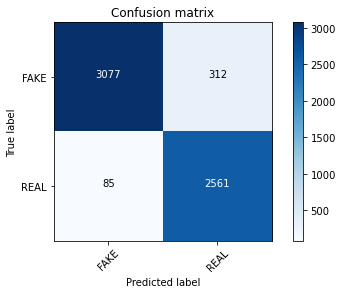

In [27]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
pred = clf.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [28]:
import pickle


In [40]:
input = "Guillermo Barros Schelotto was not the first Argentine player to set foot on a Major League Soccer field. Statistically speaking, he was the 28th when he made his debut for the Columbus Crew in 2007. But Schelottoâ€™s phone still rings to this day, more than six years after he left the league, with calls from fellow Argentines looking for advice. Though Schelotto, 43, is currently the coach of Boca Juniors, the most decorated team in Argentina, most of the players who call him want to talk about other teams, about other countries, about a soccer world away from the   environment of Buenos Aires. â€œMost of them like to talk about the cities,â€ Schelotto said. Many of them find a way to come. Argentines now make up the   demographic in M. L. S. trailing only Americans. According to the Elias Sports Bureau, going into this seasonâ€™s openers, 98 Argentine players had been featured in an M. L. S.   game since the leagueâ€™s inception. Sebastian Blanco, a new designated player for Portland, made his debut in an opener Friday and became No. 99. In a ranking by nationality, Argentines have the   goal total, too. Twelve of the 22 teams in M. L. S. will start the season with at least one Argentine on their roster, a list that includes stars like Dallasâ€™s Mauro Diaz and Montrealâ€™s Ignacio Piatti and newcomers like Atlantaâ€™s Hector Villalba and New York City F. C.â€™s Maxi Moralez. Why do they come? For some itâ€™s the money, or at least the promise that it will be paid regularly. Others come for the lifestyle, the chance to fade into a comparative anonymity unavailable to them at home, or to live the â€œquiet, cleanâ€ life that Schelotto describes as he reminisces about his days in Ohio. The Portland Timbers playmaker Diego Valeri was one such player who called Schelotto, his former manager, and he eventually heeded his advice. But he said it was for an entirely different reason. A year before he signed with Portland, while under contract to his hometown club Lanus, Valeri had had a gun pressed to his throat when robbers attempted to steal his BMW with his wife, Florencia, and daughter, Connie, inside. â€œAfter that moment,â€ Valeri said with considerable understatement, â€œwe thought about opportunities to play outside and know different places in the world. â€ Within a year, Valeri, who had had loan spells in Portugal and Spain, was on his way to Portland. â€œSituations like that are very hard for the Argentinian people to change,â€ he said. The    Valeri and his family are now settled in the Northwest, where he is playing arguably the best soccer of his career. He is a     and in between was named the most valuable player when Portland won the 2015 M. L. S. Cup championship game. â€œI think they like the anonymity and the tranquillity here,â€ Caleb Porter, Valeriâ€™s coach with the Timbers, said of his star and his countrymen. â€œThey really relish the opportunity to be here and to live a lifestyle thatâ€™s different to how they lived in Argentina. They transition well into M. L. S. â€ Since 2011, Portland has signed six Argentines, including its   acquisition of Blanco, 28. Valeri has been a good ambassador  â€”   he speaks English and urges newcomers to try to learn it as soon as possible, to ease the transition. But Porter and the Timbersâ€™ general manager and president of soccer, Gavin Wilkinson, believe there is another, more straightforward reason for Argentinaâ€™s outsize presence in M. L. S.: It simply produces the kind of technical player that the league desires. â€œCertain countries produce certain positions more,â€ Porter said. â€œMost teams are looking for that creative piece, and you know you can get one in Argentina. â€ A large alumni directory and strong ties to agents and consultants in the region have made that kind of shopping easier for M. L. S. teams, and in the past the struggles of the Argentine economy also favored North American clubs, some said. But there also has been a change in the kind of individual looking to make the move north, and that has dovetailed with the leagueâ€™s overall transfer policy. As the quality of M. L. S. has improved as it enters its third decade, its teams have looked less for marketability from its imports  â€”   which in the past had trended toward aging, often European stars  â€”   and more toward onfield impact and value. The latest class of Argentines reflects this shift, as they enter a league where the average age of designated players  â€”   the teamâ€™s   stars  â€”   has fallen below 28, its lowest point in a decade. â€œThey know that M. L. S. is different to 10 years ago,â€ said Schelotto, who was 34 when he moved to the league. â€œThey can go, make good money, play with some pressure. They know they can make a career in the United States and then maybe move to Europe. â€œTen years ago, it was impossible. Right now, you can. â€ There are currently 24 Argentines playing in the league. Atlanta United and its Argentine coach, Tata Martino, brought in three ahead of its first season, each of them 25 or younger (Villalba is just 22). Buying young is now seen as more of a benefit to clubs than a risk, as players who continue to develop retain a   value if they move on to brighter prospects in Europe. â€œPeople are coming here younger and younger, maybe to start their careers,â€ Ignacio Piatti, a    playmaker for the Montreal Impact, said through an interpreter. â€œItâ€™s what they are looking for at that age: being able to live a comfortable life off the field and focus on their games. â€ Piatti, like Schelotto, has been happy to offer advice to the next wave of Argentine talents considering entering M. L. S. including players on both sides of the Hudson River. Gonzalo Veron, 27, of the Red Bulls, and Moralez, 30, who recently signed with New York City F. C. both acknowledged that they had turned to Piatti for advice before signing. At a community event in East Harlem last week, Moralez  â€”   who spent four years in Italy  â€”   reflected on his decision to move to the United States. He had never been to New York City before signing, he said, and after turning to the likes of Piatti and David Villa for advice about the leagueâ€™s standard of play, he said he also sought assurances for his family, who are set to join him in New York shortly. â€œFirst off, I just want to enjoy football,â€ Moralez said. â€œBut also to get to know the beauty of the city and the country. Not everybody gets the opportunity to come here. â€"
ps = PorterStemmer()
corpus = []

review = re.sub('[^a-zA-Z]', ' ', input)
review = review.lower()
review = review.split()

review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
input = [review]
input = cv.transform(input).toarray()
input

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
# Saving model to disk
pickle.dump(clf, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

pickle.dump(cv, open("cv.pickle", "wb"))

print(model.predict(input))
a = int(model.predict(input))
a

[0]


0